# Building Wine Classifier Model with PyCaret

In [41]:
import pandas as pd
import numpy as np

In [42]:
wine_df = pd.read_csv('D:/Dataset/Wine Quality/wine_qual.csv')

In [43]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Transform quality feature into binary (Good or Bad)

In [44]:
wine_df.quality = np.where(wine_df.quality >= 6,'Good', 'Bad')

In [45]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad


## Compare Model with Default Setup

In [46]:
from pycaret.classification import *

In [47]:
exp_clf101 = setup(data = wine_df, target = 'quality', session_id=123)

,Description,Value
0,session_id,123
1,Target,quality
2,Target Type,Binary
3,Label Encoded,"Bad: 0, Good: 1"
4,Original Data,"(1599, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [34]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8222,0.8973,0.8384,0.8357,0.8364,0.6416,0.6429,0.1970
et,Extra Trees Classifier,0.8159,0.9044,0.8319,0.8302,0.8306,0.6290,0.6299,0.1980
xgboost,Extreme Gradient Boosting,0.8132,0.8799,0.8220,0.8327,0.8267,0.6242,0.6254,0.3030
lightgbm,Light Gradient Boosting Machine,0.8132,0.8849,0.8204,0.8346,0.8266,0.6242,0.6257,0.0820
catboost,CatBoost Classifier,0.8132,0.8741,0.8188,0.8362,0.8263,0.6244,0.6265,2.0610
gbc,Gradient Boosting Classifier,0.7855,0.8593,0.7990,0.8071,0.8018,0.5682,0.5703,0.0530
ridge,Ridge Classifier,0.7569,0.0000,0.7497,0.7910,0.7688,0.5131,0.5151,0.0070
lr,Logistic Regression,0.7507,0.8176,0.7480,0.7825,0.7642,0.5000,0.5015,0.6530
lda,Linear Discriminant Analysis,0.7489,0.8173,0.7513,0.7779,0.7635,0.4960,0.4974,0.0070
dt,Decision Tree Classifier,0.7444,0.7411,0.7809,0.7568,0.7684,0.4835,0.4841,0.0080


## Compare Models with Tuned Setup

In [36]:
exp_clf102 = setup(data = wine_df, target = 'quality', session_id=123,
                  normalize = True, 
                  transformation = True)

,Description,Value
0,session_id,123
1,Target,quality
2,Target Type,Binary
3,Label Encoded,"Bad: 0, Good: 1"
4,Original Data,"(1599, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [37]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8231,0.9036,0.8402,0.8360,0.8375,0.6433,0.6444,0.1950
rf,Random Forest Classifier,0.8222,0.8976,0.8351,0.8380,0.8359,0.6418,0.6430,0.2040
lightgbm,Light Gradient Boosting Machine,0.8141,0.8835,0.8237,0.8337,0.8275,0.6260,0.6277,0.0790
catboost,CatBoost Classifier,0.8141,0.8742,0.8204,0.8365,0.8273,0.6261,0.6282,2.1700
xgboost,Extreme Gradient Boosting,0.8132,0.8799,0.8220,0.8327,0.8267,0.6242,0.6254,0.1840
gbc,Gradient Boosting Classifier,0.7873,0.8597,0.7991,0.8095,0.8030,0.5720,0.5741,0.0530
lr,Logistic Regression,0.7525,0.8201,0.7727,0.7719,0.7711,0.5015,0.5032,0.0090
qda,Quadratic Discriminant Analysis,0.7507,0.8123,0.7760,0.7679,0.7711,0.4972,0.4985,0.0070
ridge,Ridge Classifier,0.7498,0.0000,0.7595,0.7750,0.7659,0.4972,0.4990,0.0080
lda,Linear Discriminant Analysis,0.7498,0.8214,0.7595,0.7750,0.7659,0.4972,0.4990,0.0070


## Build Extra Tree Classifier and Plot Confusion MAtrix

In [38]:
et_model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8304,0.9082,0.7869,0.8889,0.8348,0.6618,0.6670
1,0.8214,0.9190,0.8361,0.8361,0.8361,0.6400,0.6400
2,0.8482,0.9357,0.8525,0.8667,0.8595,0.6945,0.6946
3,0.8393,0.9037,0.8689,0.8413,0.8548,0.6749,0.6754
4,0.8304,0.8939,0.8689,0.8281,0.8480,0.6563,0.6573
5,0.8393,0.9248,0.8361,0.8644,0.8500,0.6770,0.6775
6,0.8125,0.9031,0.8525,0.8125,0.8320,0.6202,0.6211
7,0.7768,0.8720,0.8333,0.7692,0.8000,0.5484,0.5506
8,0.8036,0.8817,0.8167,0.8167,0.8167,0.6051,0.6051
9,0.8288,0.8943,0.8500,0.8361,0.8430,0.6549,0.6550


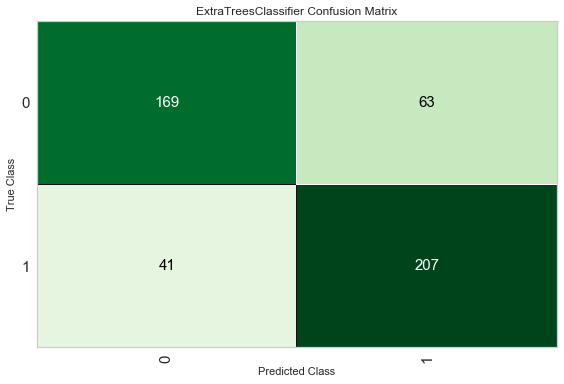

In [39]:
plot_model(et_model, plot='confusion_matrix')

## Save Model

In [40]:
save_model(et_model, model_name = 'extra_tree_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='quality',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nod